In [13]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from dotenv import dotenv_values

from sqlalchemy import create_engine, types
from sqlalchemy import text # to be able to pass string

import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
from dotenv import dotenv_values

config = dotenv_values()

# define variables for the login
pg_user = config['POSTGRES_USER']  # align the key label with your .env file !
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']


url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'


In [15]:
engine = create_engine(url, echo=False)

In [16]:
my_schema = 'capstone_barstov_industries'

with engine.begin() as conn: 
    result = conn.execute(text(f'SET search_path TO {my_schema};'))


In [29]:
with engine.begin() as conn: # Done with echo=False
    result = conn.execute(text(f'''
                               SELECT * FROM product_analysis; 
                                '''))
    data = result.all()

### Let's create a dataframe out of that
product_analysis = pd.DataFrame(data)#, columns=['...', '...', '...']) 
product_analysis

,article_id,product_type_no,product_type_name,product_group_name,colour_group_code,colour_group_name,index_code,index_name,section_name,garment_group_no,unique_customers,total_sales,average_price,month,week,units_sold,abc_category,avg_customer_age,postal_code
0,572797001,253,Vest top,Garment Upper body,9,Black,A,Ladieswear,Womens Casual,1005,9623,1.401441,0.010523,2020-08-01,2020-08-17,49,A,39.823633,f8e422ead9eb7b22f861bdc7ab44586cb8103c275e2337...
1,898931001,253,Vest top,Garment Upper body,9,Black,A,Ladieswear,Womens Casual,1005,480,1.636340,0.011504,2020-08-01,2020-08-17,51,A,37.151210,80355192cecd5f9e9bc8994f4aded657eb0cc373e8e1d7...
2,884754001,274,Shorts,Garment Lower body,93,Dark Green,F,Menswear,Men Underwear,1002,187,0.389559,0.023839,2020-08-01,2020-08-10,16,A,35.058511,403b00eebb203284edddcee9da2c13d6a819c35f609c31...
3,893429001,67,Belt,Accessories,9,Black,C,Ladies Accessories,Womens Big accessories,1019,526,0.065203,0.008249,2020-08-01,2020-08-10,9,B,30.569316,4f88f48fd1345f6ae3a634caadee2d9355d50a34f3ec53...
4,856840001,265,Dress,Garment Full body,12,Light Beige,A,Ladieswear,Womens Everyday Collection,1005,1707,5.455941,0.016212,2020-08-01,2020-08-17,102,A,49.056150,65e83d1376cd2882461012272f95450b96795dfbc3243b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104505,941138001,255,T-shirt,Garment Upper body,9,Black,I,Children Sizes 134-170,Girls Underwear & Basics,1002,1,0.016932,0.016932,2020-09-01,2020-09-14,1,C,48.000000,e3fc02798f64670d30a3a0d3bfa0169e58261d6e0d92cf...
104506,874848006,255,T-shirt,Garment Upper body,7,Grey,H,Children Sizes 92-140,Kids Boy,1005,1,0.016932,0.016932,2020-07-01,2020-07-20,1,C,35.000000,63d6d7a3e63979990b8aad4ebb55fa1b4abe1f522a3109...
104507,806293001,69,Cap/peaked,Accessories,51,Light Pink,J,"Children Accessories, Swimwear",Kids Outerwear,1019,1,0.008458,0.008458,2020-08-01,2020-08-03,1,C,35.000000,86af1af82002c1fbd2da8769c2bea30e5a09709dcbf445...
104508,620216073,273,Leggings/Tights,Garment Lower body,73,Dark Blue,H,Children Sizes 92-140,Girls Underwear & Basics,1002,1,0.010153,0.010153,2020-07-01,2020-07-20,1,C,28.000000,875d6ab894415ba0139c42ba08d4c2667f1a851d7c578a...


In [30]:
product_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104510 entries, 0 to 104509
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   article_id          104510 non-null  int64  
 1   product_type_no     104510 non-null  int64  
 2   product_type_name   104510 non-null  object 
 3   product_group_name  104510 non-null  object 
 4   colour_group_code   104510 non-null  int64  
 5   colour_group_name   104510 non-null  object 
 6   index_code          104510 non-null  object 
 7   index_name          104510 non-null  object 
 8   section_name        104510 non-null  object 
 9   garment_group_no    104510 non-null  int64  
 10  unique_customers    104510 non-null  int64  
 11  total_sales         104510 non-null  float64
 12  average_price       104510 non-null  float64
 13  month               104510 non-null  object 
 14  week                104510 non-null  object 
 15  units_sold          104510 non-nul

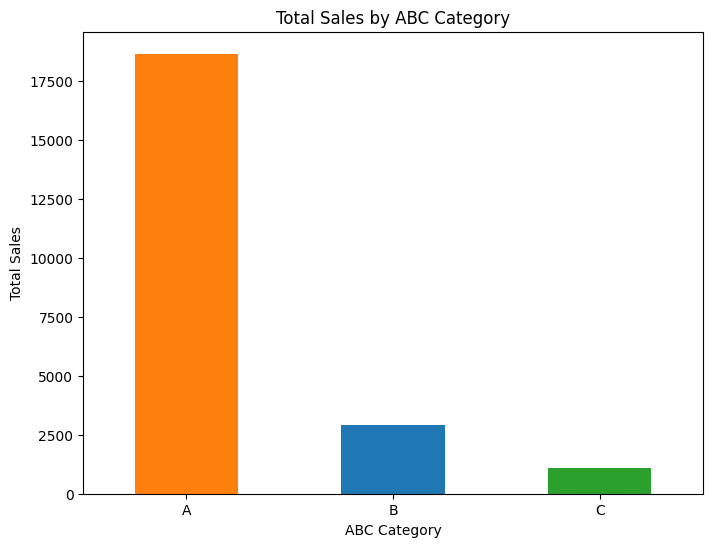

In [26]:

# Aggregate total_sales by abc_category
abc_summary = product_analysis.groupby('abc_category')['total_sales'].sum().sort_index()

# Plot a simple bar chart
plt.figure(figsize=(8, 6))
abc_summary.plot(kind='bar', color=['#FF7F0E', '#1F77B4', '#2CA02C'])
plt.title('Total Sales by ABC Category')
plt.xlabel('ABC Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()


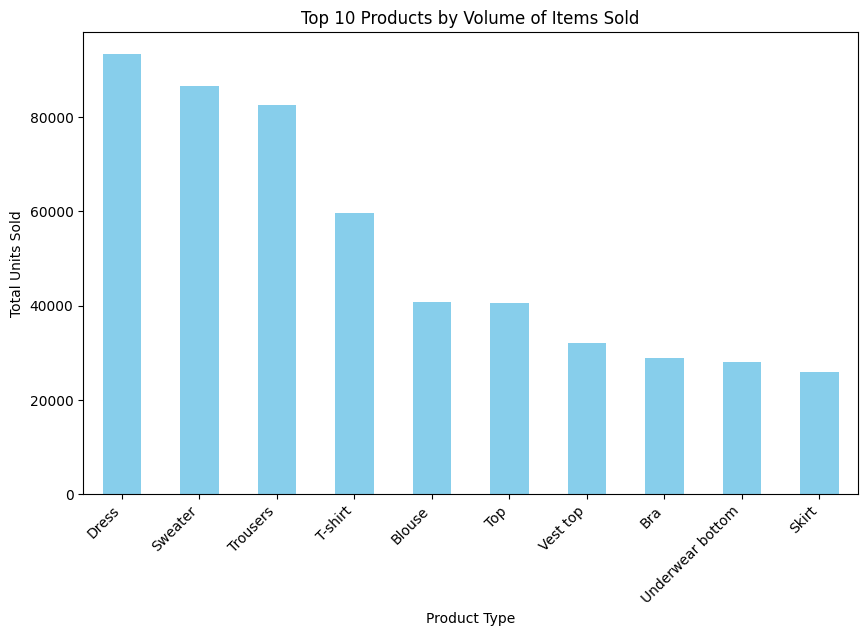

In [27]:

# Aggregate units sold by product
top_products_by_volume = product_analysis.groupby('product_type_name')['units_sold'].sum().sort_values(ascending=False).head(10)

# Plotting the top products by volume
plt.figure(figsize=(10, 6))
top_products_by_volume.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Volume of Items Sold')
plt.xlabel('Product Type')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')

plt.show()


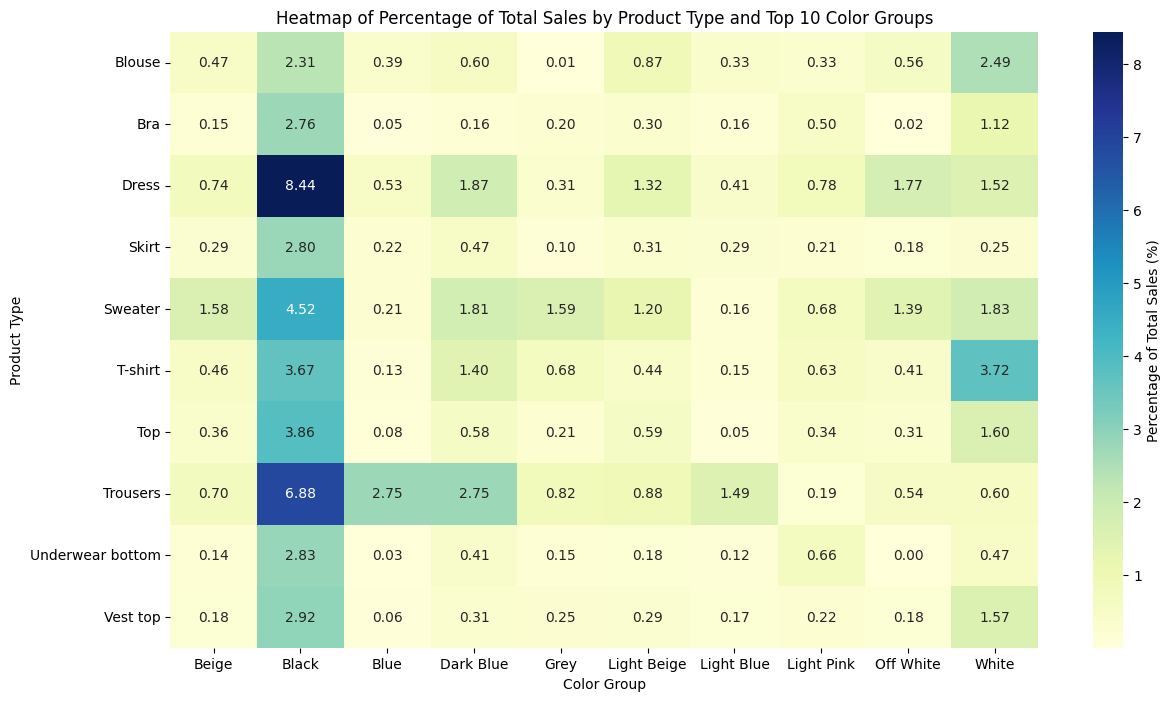

In [34]:
# Calculate the total units sold for the filtered dataset
total_units_sold = filtered_data['units_sold'].sum()

# Pivot table for product type and color group, then calculate the percentage
pivot_table = filtered_data.pivot_table(values='units_sold', index='product_type_name', columns='colour_group_name', aggfunc='sum')
pivot_table_percentage = pivot_table / total_units_sold * 100

# Plot the heatmap with percentage values
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_percentage, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Percentage of Total Sales (%)'})
plt.title('Heatmap of Percentage of Total Sales by Product Type and Top 10 Color Groups')
plt.xlabel('Color Group')
plt.ylabel('Product Type')

plt.show()




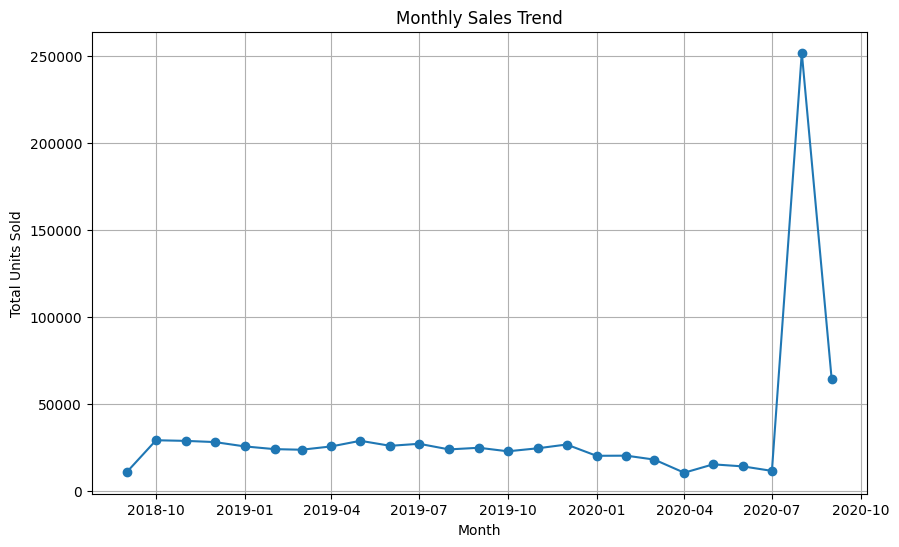

In [35]:

# Aggregate units sold by month
monthly_sales = product_analysis.groupby('month')['units_sold'].sum()

# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.grid(True)

plt.show()


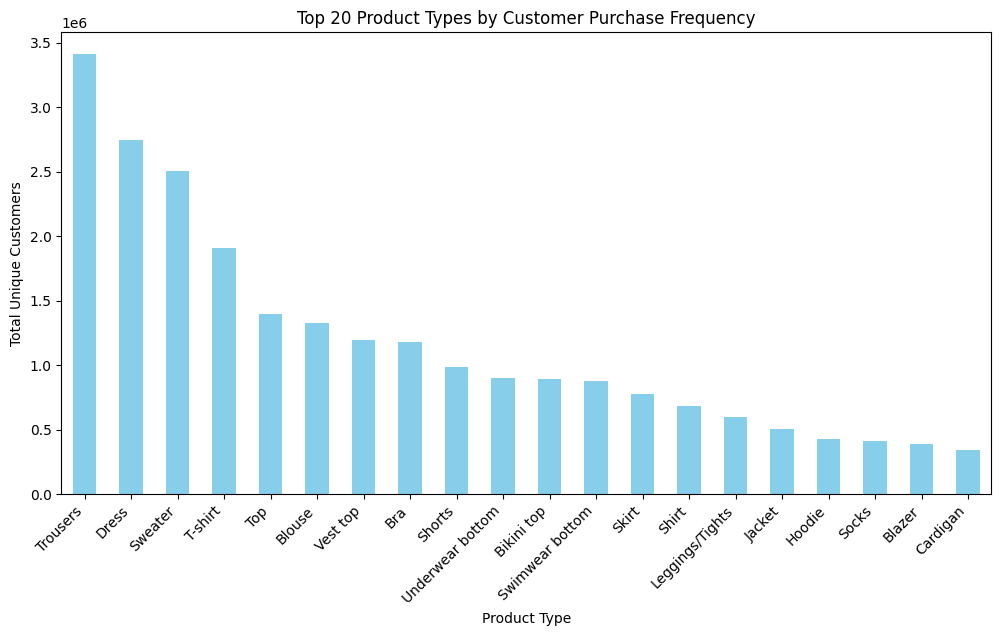

In [37]:
# Aggregate unique_customers by product type and select the top 20
customer_frequency_top20 = product_analysis.groupby('product_type_name')['unique_customers'].sum().sort_values(ascending=False).head(20)

# Plotting the top 20 product types by customer purchase frequency
plt.figure(figsize=(12, 6))
customer_frequency_top20.plot(kind='bar', color='skyblue')
plt.title('Top 20 Product Types by Customer Purchase Frequency')
plt.xlabel('Product Type')
plt.ylabel('Total Unique Customers')
plt.xticks(rotation=45, ha='right')

plt.show()



/var/folders/4d/qdk_qyjn1ng60t10crv82wj00000gn/T/ipykernel_61502/309251400.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_demand = filtered_data.groupby(['product_type_name', 'age_group'])['units_sold'].sum().unstack()


<Figure size 1400x800 with 0 Axes>

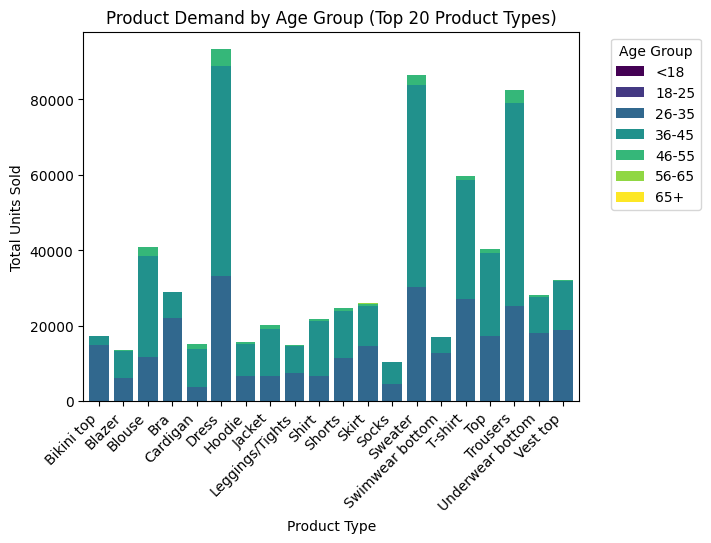

In [38]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
product_analysis['age_group'] = pd.cut(product_analysis['avg_customer_age'], bins=age_bins, labels=age_labels)

# Identify the top 20 product types by units sold
top20_product_types = product_analysis.groupby('product_type_name')['units_sold'].sum().sort_values(ascending=False).head(20).index

# Filter the data for only these top 20 product types
filtered_data = product_analysis[product_analysis['product_type_name'].isin(top20_product_types)]

# Aggregate units sold by product type and age group
age_demand = filtered_data.groupby(['product_type_name', 'age_group'])['units_sold'].sum().unstack()

# Plotting the stacked bar chart for the top 20 product types by age group
plt.figure(figsize=(14, 8))
age_demand.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)
plt.title('Product Demand by Age Group (Top 20 Product Types)')
plt.xlabel('Product Type')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


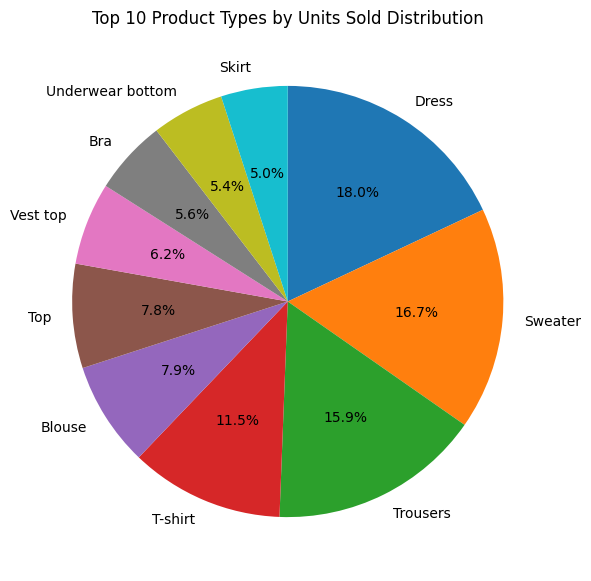

In [40]:
# Aggregate units sold by product type and select the top 10
top_product_distribution = product_analysis.groupby('product_type_name')['units_sold'].sum().sort_values(ascending=False).head(10)

# Plotting the distribution as a pie chart
plt.figure(figsize=(10, 7))
top_product_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Top 10 Product Types by Units Sold Distribution')
plt.ylabel('')  # Remove y-label for a cleaner look

plt.show()


/var/folders/4d/qdk_qyjn1ng60t10crv82wj00000gn/T/ipykernel_61502/3917448266.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg_units = product_analysis.groupby('product_type_name').apply(lambda x: x['units_sold'].sum() / x['unique_customers'].sum()).sort_values(ascending=False).head(10)


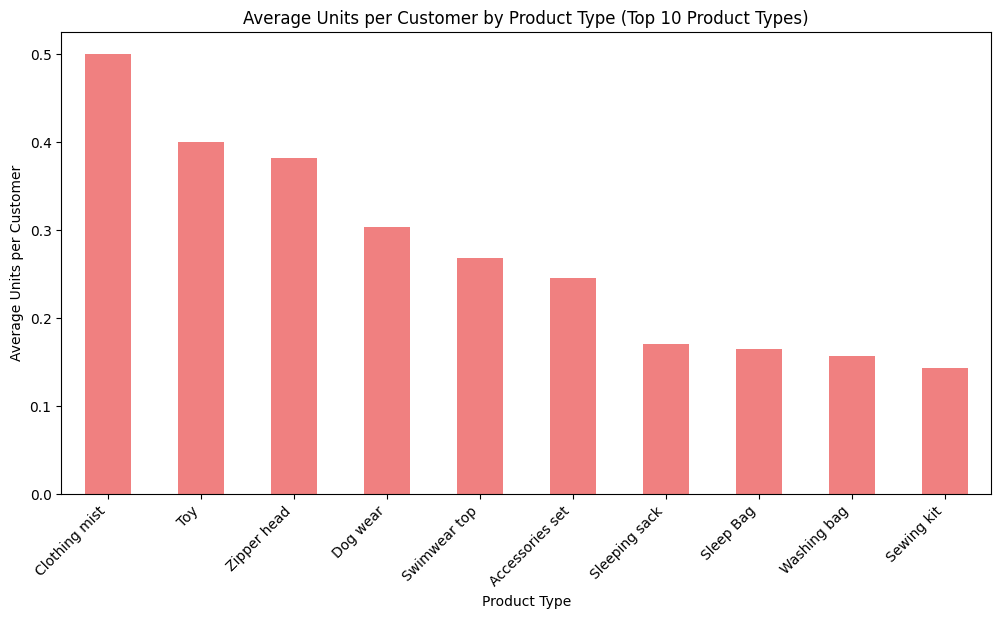

In [43]:
# Calculate average units per customer for each product type
product_avg_units = product_analysis.groupby('product_type_name').apply(lambda x: x['units_sold'].sum() / x['unique_customers'].sum()).sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
product_avg_units.plot(kind='bar', color='lightcoral')
plt.title('Average Units per Customer by Product Type (Top 10 Product Types)')
plt.xlabel('Product Type')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45, ha='right')

plt.show()

